<a href="https://colab.research.google.com/github/nicoussj/MachineLearning/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

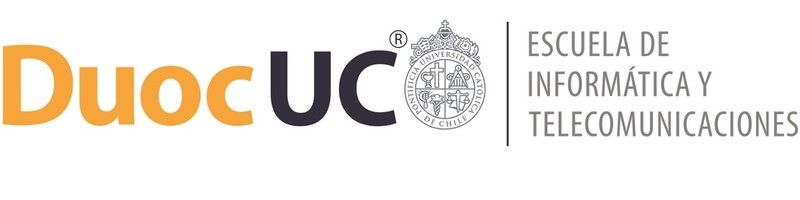

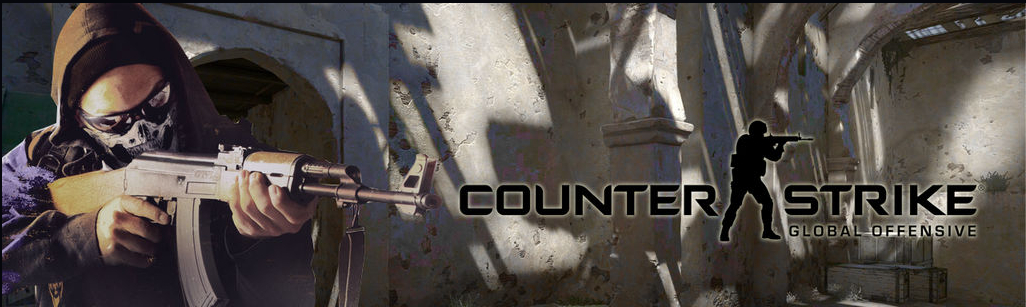

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Gabriel Valderas
* Nicolas Chiguay
* Benjamín Mancilla
* Matias Riveros


Docente: Giocrisrai Godoy     

Sección: MLY0100 - 002D

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

In [ ]:
# Insertar cuantos bloques de código y markdown consideren necesarios

# Se recomienda investigar sobre el contexto de negocio, sobre los datos, uso de
# los campos en estadísticas de juegos, ver en qué se relacionan los contenidos
# revisados en la asignatura con lo planteado como caso de estudio.
# Plantear hipótesis del negocio posibles para objetivos de tareas de regresión y de clasificación

Hipotesis 1 (Gabriel Valderas y Nicolas Chiguay)

Categorica

1.- La proporción de headshots respecto a kills varía significativamente según el mapa jugado.

Regresiva

1.- Existe una relación positiva entre el valor de equipamiento al inicio de ronda RoundStartingEquipmentValue y la cantidad de kills MatchKills obtenidas por equipo en una partida, en los diferentes mapas.

Hipotesis 2 (Benjamín Mancilla y Matias Riveros)

Categorica

1.-La popularidad de un mapa está asociada a su equilibrio entre victorias de Counter-Terrorists y Terrorists.

Regresiva

2.-Existe una relación positiva entre el número promedio de rondas jugadas por partida y la cantidad total de partidas jugadas por mapa.


Imports Necesarios

In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings

# Configuraciones para gráficos
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Ignorar advertencias
warnings.filterwarnings('ignore')

Cargamos data set

In [ ]:

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='latin1', header=0)

df.columns = df.columns.str.replace(';', '')

df.head(10)


Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


NameError: name 'pd' is not defined

Exploracion inicial y tipos de datos

In [ ]:
# Información general del dataset
print("\nInformación general del dataset:")
df.info()

# Descripción estadística básica
print("\nEstadísticas descriptivas básicas:")
df.describe()

# Verificar valores nulos
print("\nCantidad de valores nulos por columna:")
df.isnull().sum()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-n

,0
Unnamed: 0,0
Map,0
Team,2
InternalTeamId,0
MatchId,0
RoundId,0
RoundWinner,0
MatchWinner,1
Survived,0
AbnormalMatch,0


In [ ]:
#Selección de datos nulos en columna MatchWinner
df[df['MatchWinner'].isnull()]

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
29,629,de_inferno,CounterTerrorist,2,4,3,False4,NaN,True,False,...,0,0,0,0,4250,22850,2,0,1,2


In [ ]:
#Verificación de la cantidad de jugadores por equipo (ver si hay que
#eliminar partidas por un número incorrecto de equipo)
for partida in df['MatchId'].unique():
  cant_t1 = df[(df['InternalTeamId']==1) & (df['MatchId']==partida)]['Map'].count()
  cant_t2 = df[(df['InternalTeamId']==2) & (df['MatchId']==partida)]['Map'].count()
  if(cant_t1-cant_t2!=0):
    print(f"Partida {partida}: {cant_t1-cant_t2}")

Partida 6: 1
Partida 179: -1
Partida 395: -1


In [ ]:

#Resumen de Medidas de posición, para datos numéricos
df.describe(include="number")

,Unnamed: 0,InternalTeamId,MatchId,RoundId,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
count,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,...,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000,79157.000000
mean,60570.193640,1.500006,250.525033,12.765517,0.498667,1.258057,0.675363,0.089840,0.005964,0.007046,...,0.671349,0.146178,0.301553,0.095633,3778.108695,18890.133532,8.511578,1.209912,1.874831,3.858484
std,36436.598386,0.500003,149.557804,7.432837,0.597985,1.184909,0.464125,0.279797,0.075497,0.082453,...,0.881798,0.385601,0.578843,0.320641,2111.285406,9743.203024,6.195079,1.435150,1.824027,3.246752
min,600.000000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30830.000000,1.000000,128.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1600.000000,10900.000000,3.000000,0.000000,0.000000,1.000000
50%,56720.000000,2.000000,236.000000,12.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4700.000000,22550.000000,8.000000,1.000000,1.000000,3.000000
75%,90639.000000,2.000000,373.000000,19.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,5200.000000,26050.000000,13.000000,2.000000,3.000000,6.000000
max,123779.000000,2.000000,511.000000,36.000000,4.000000,6.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,4.000000,5.000000,5.000000,8850.000000,36150.000000,41.000000,11.000000,14.000000,22.000000


In [ ]:

#Resumen de Medidas de posición, para datos categóricos
df.describe(include='object')

,Map,Team,RoundWinner,MatchWinner,TimeAlive,TravelledDistance,FirstKillTime
count,79157,79155,79157,79156,79157,79157,79157
unique,4,2,5,2,51627,78001,33855
top,de_inferno,Terrorist,False,False,0.0,0.0,0.0
freq,28869,39591,23195,42017,68,272,5305


In [ ]:
columnas = df.columns
for columna in columnas:
  if df[columna].dtype == int:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa discreta")
  elif df[columna].dtype == float:
    print(f"Columna {columna} ------ Tipo de variable: Cuantitativa continua")
  elif df[columna].dtype == object:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa nominal")
  elif df[columna].dtype == bool:
    print(f"Columna {columna} ------ Tipo de variable: Cualitativa ordinal")

Columna Unnamed: 0 ------ Tipo de variable: Cuantitativa discreta
Columna Map ------ Tipo de variable: Cualitativa nominal
Columna Team ------ Tipo de variable: Cualitativa nominal
Columna InternalTeamId ------ Tipo de variable: Cuantitativa discreta
Columna MatchId ------ Tipo de variable: Cuantitativa discreta
Columna RoundId ------ Tipo de variable: Cuantitativa discreta
Columna RoundWinner ------ Tipo de variable: Cualitativa nominal
Columna MatchWinner ------ Tipo de variable: Cualitativa nominal
Columna Survived ------ Tipo de variable: Cualitativa ordinal
Columna AbnormalMatch ------ Tipo de variable: Cualitativa ordinal
Columna TimeAlive ------ Tipo de variable: Cualitativa nominal
Columna TravelledDistance ------ Tipo de variable: Cualitativa nominal
Columna RLethalGrenadesThrown ------ Tipo de variable: Cuantitativa discreta
Columna RNonLethalGrenadesThrown ------ Tipo de variable: Cuantitativa discreta
Columna PrimaryAssaultRifle ------ Tipo de variable: Cuantitativa continu

## Fase 2: Data Understanding

**-------------------------------------------------------------------------**

In [ ]:
# Insertar cuantos bloques de código consideren necesarios

# Se recomienda obtener estadísticos descriptivos para apoyar hipótesis inferenciales.
# Reconocer la naturaleza de los datos y como tratarlos en etapas posteriores y dar ideas de como se podría transformar.
# Identificar MissingValues, outliers, medidas de posición, medidas de dispersión etc.

Datos Nulos

In [ ]:

missing_values = df.isnull().sum()


print(missing_values[missing_values > 0])


Team           2
MatchWinner    1
dtype: int64


Media

Mediana

Moda

Varianza

Desviación estándar

In [ ]:
for dato in df.columns:
  if df[dato].dtype in [int,float]:
    print(f"La media de la columna {dato} es: {df[dato].mean()} - La moda es: {df[dato].mode()[0]} - La mediana es: {df[dato].median()} - La desviación estándar es: {df[dato].std()}\n")
  elif df[dato].dtype in [object, bool]:
    print(f"En la columna {dato}, existen {df[dato].unique().size} dato/s. Los datos son: {df[dato].unique()}. El que más se repite es {df[dato].value_counts().index[0]} con {df[dato].value_counts().iloc[0]} repeticiones.\n")


La media de la columna Unnamed: 0 es: 60570.19364048663 - La moda es: 600 - La mediana es: 56720.0 - La desviación estándar es: 36436.59838644672

En la columna Map, existen 4 dato/s. Los datos son: ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']. El que más se repite es de_inferno con 28869 repeticiones.

En la columna Team, existen 3 dato/s. Los datos son: ['Terrorist' 'CounterTerrorist' nan]. El que más se repite es Terrorist con 39591 repeticiones.

La media de la columna InternalTeamId es: 1.500006316560759 - La moda es: 2 - La mediana es: 2.0 - La desviación estándar es: 0.500003158270506

La media de la columna MatchId es: 250.52503253028792 - La moda es: 29 - La mediana es: 236.0 - La desviación estándar es: 149.55780440842437

La media de la columna RoundId es: 12.765516631504479 - La moda es: 1 - La mediana es: 12.0 - La desviación estándar es: 7.432837007058392

En la columna RoundWinner, existen 5 dato/s. Los datos son: ['False' 'True' 'False4' True False]. El que más se re

Tipos de Columnas

In [ ]:
print(df.dtypes)

numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categoricas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print("\n📈 Columnas numéricas:")
print(numericas)

print("\n🧩 Columnas categóricas:")
print(categoricas)


Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
RoundWinner                     object
MatchWinner                     object
Survived                          bool
AbnormalMatch                     bool
TimeAlive                       object
TravelledDistance               object
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime                   object
RoundKills                       int64
RoundAssists                     int64
RoundHeadshots                   int64
RoundFlankKills                  int64
RoundStartingEquipmentValue      int64
TeamStartingEquipmentValu

Detección de Outliers

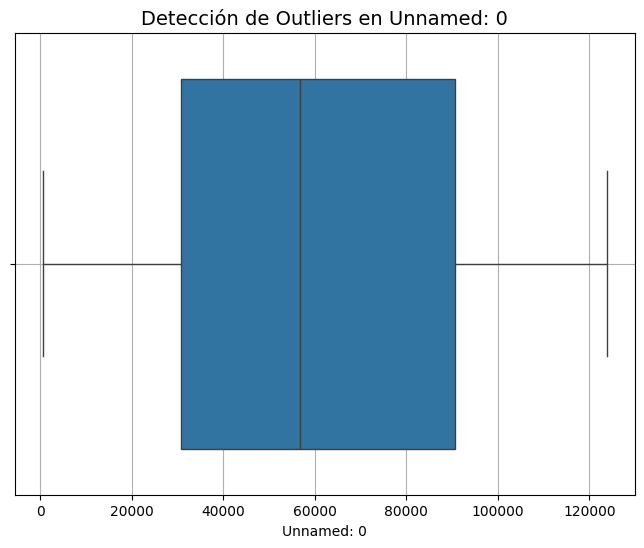

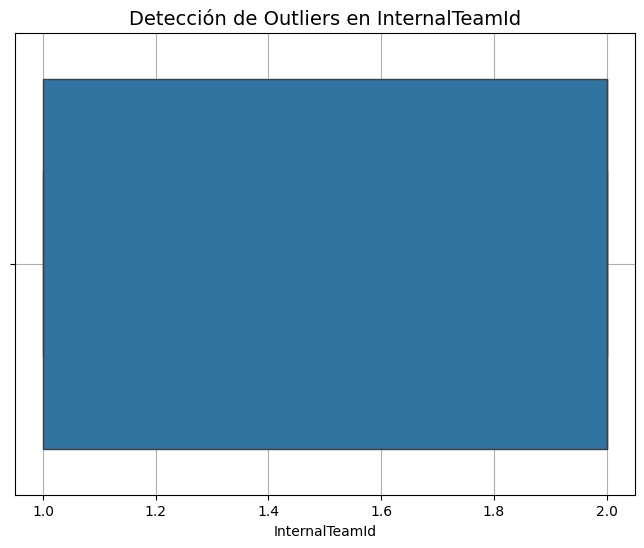

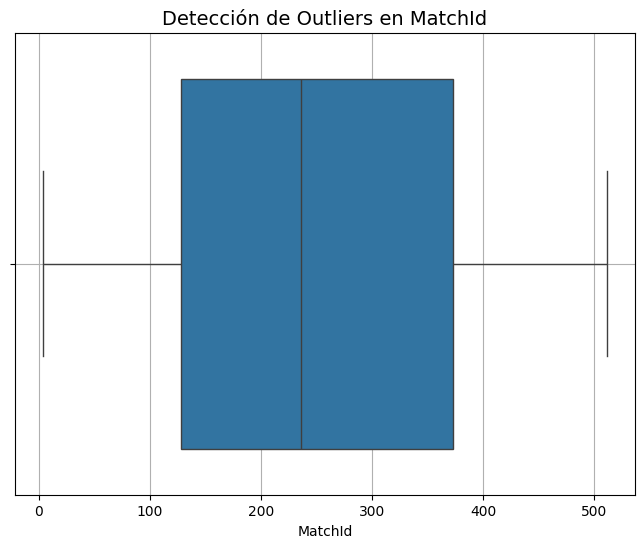

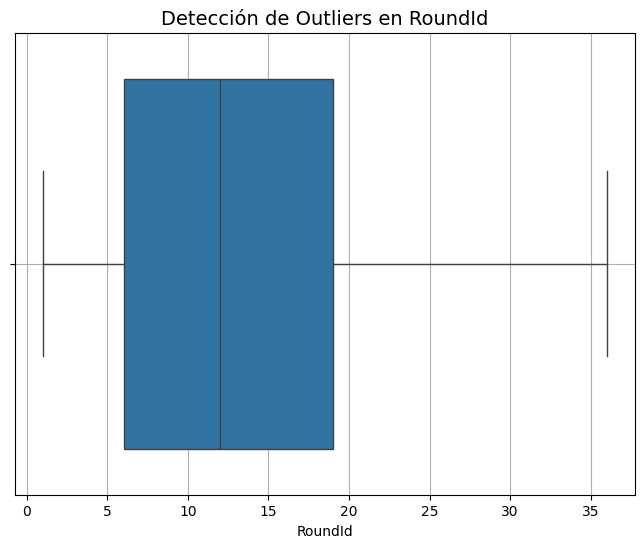

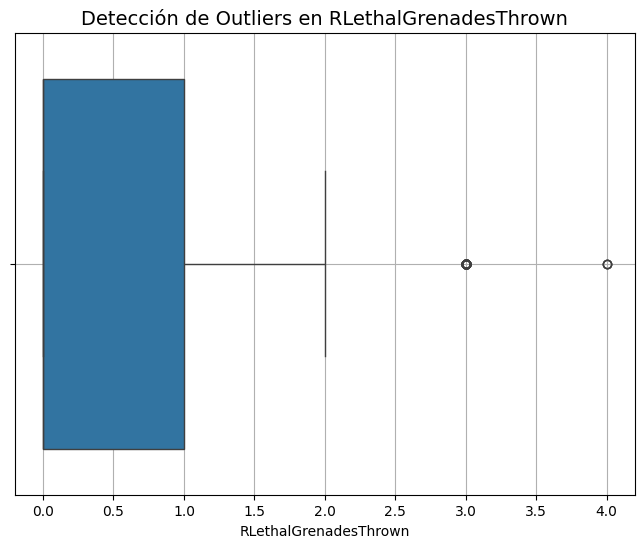

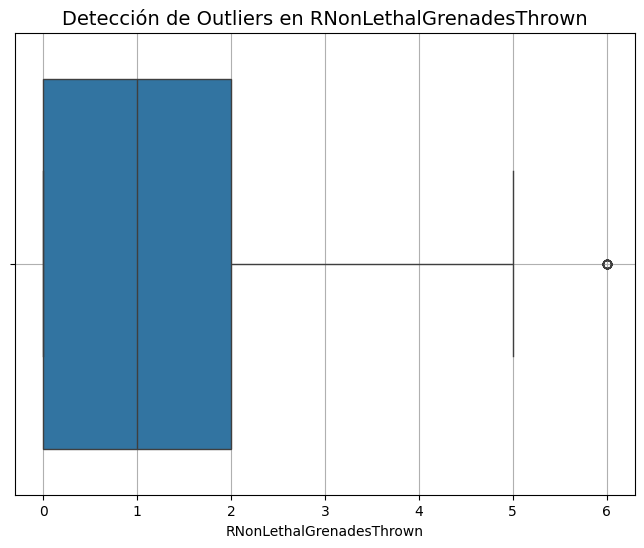

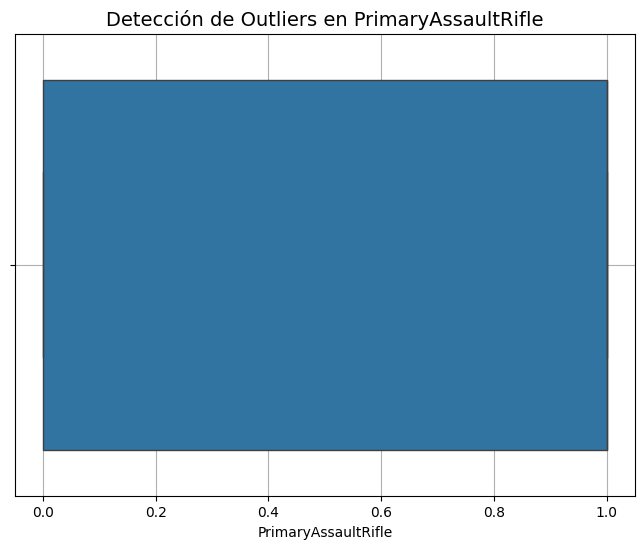

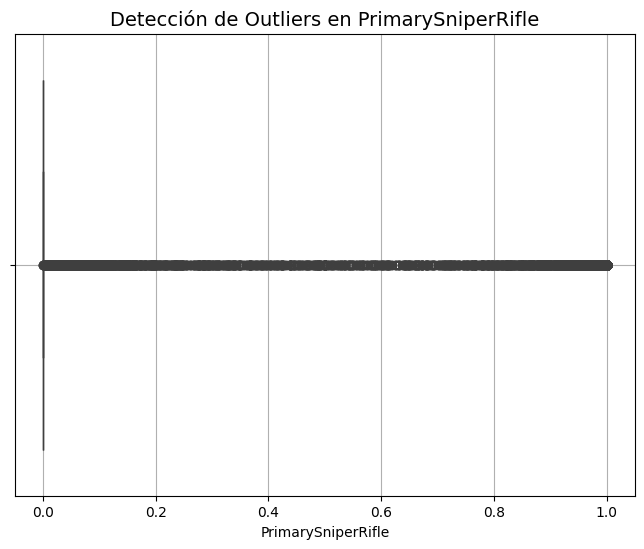

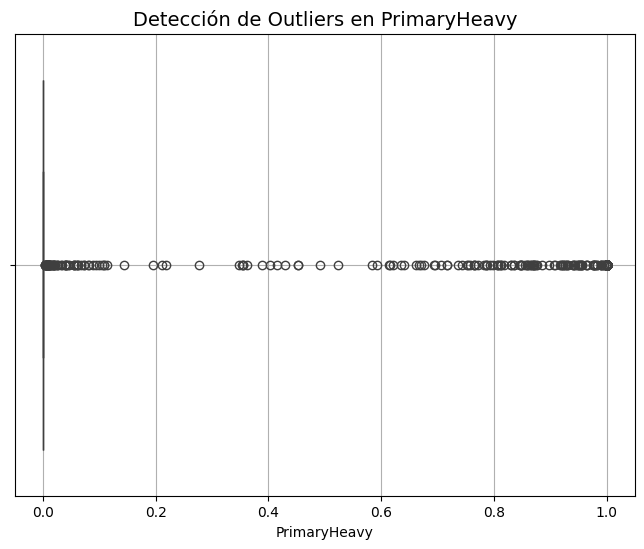

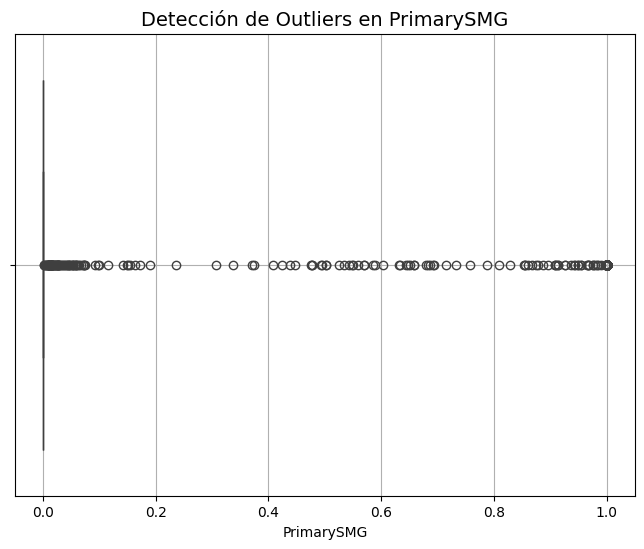

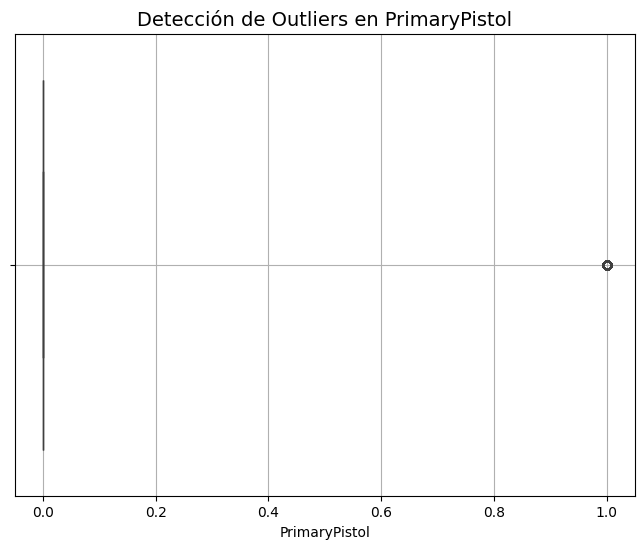

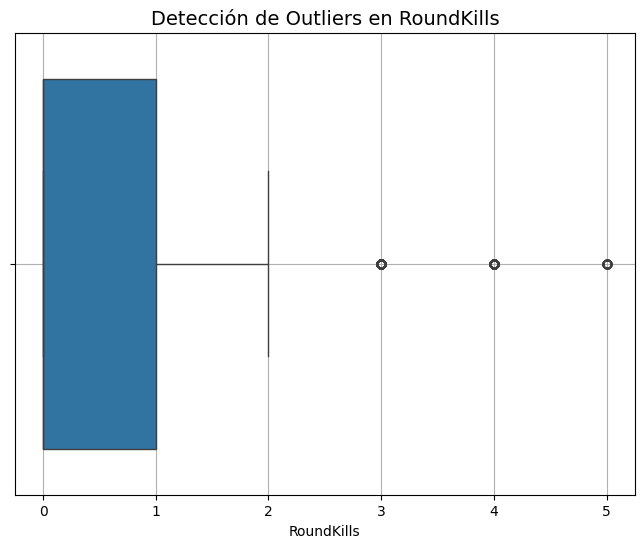

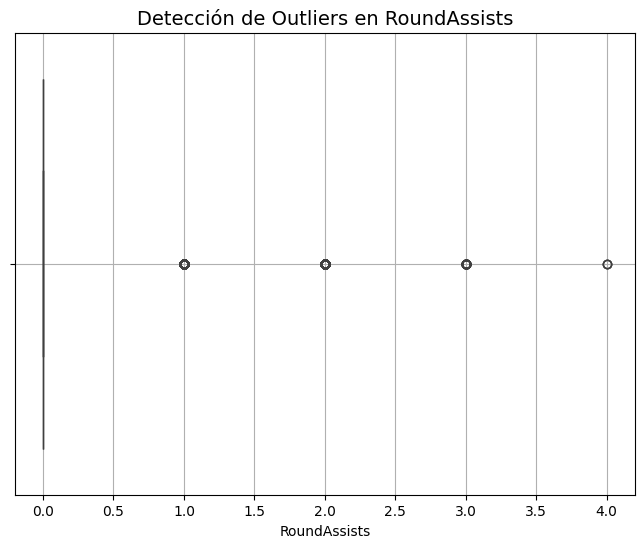

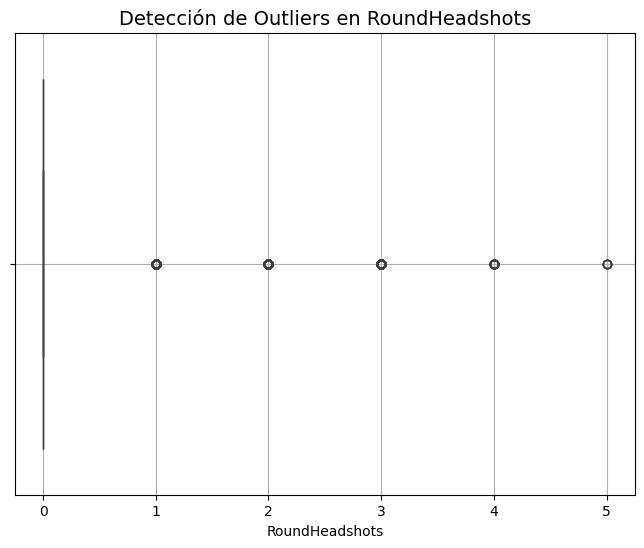

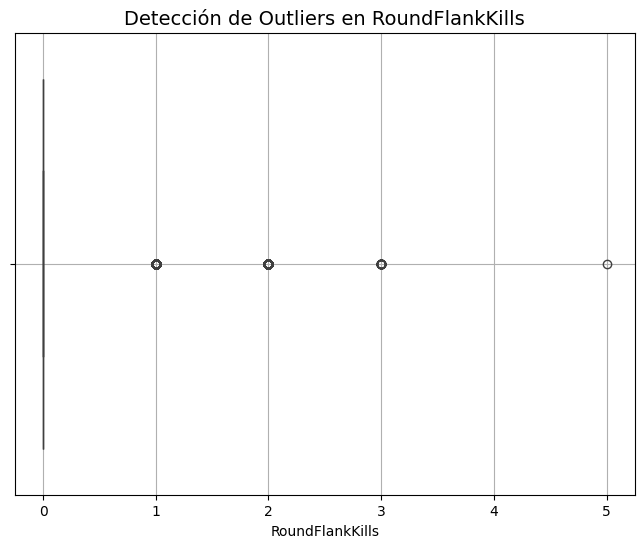

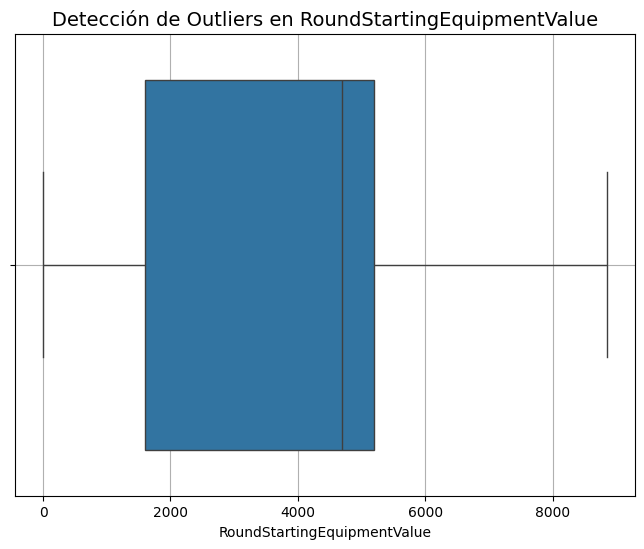

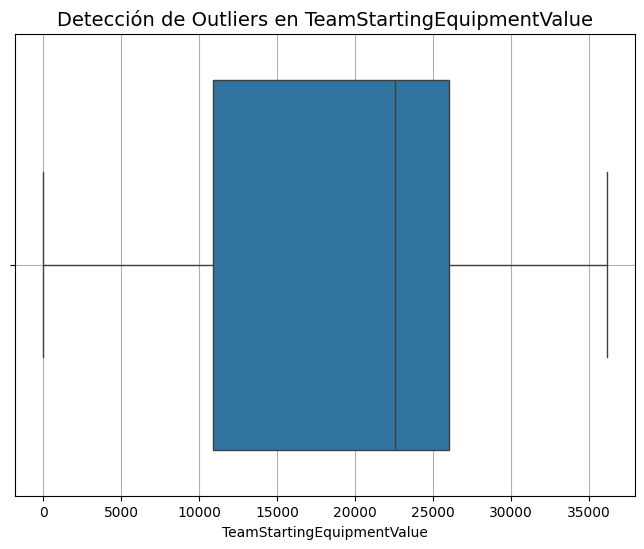

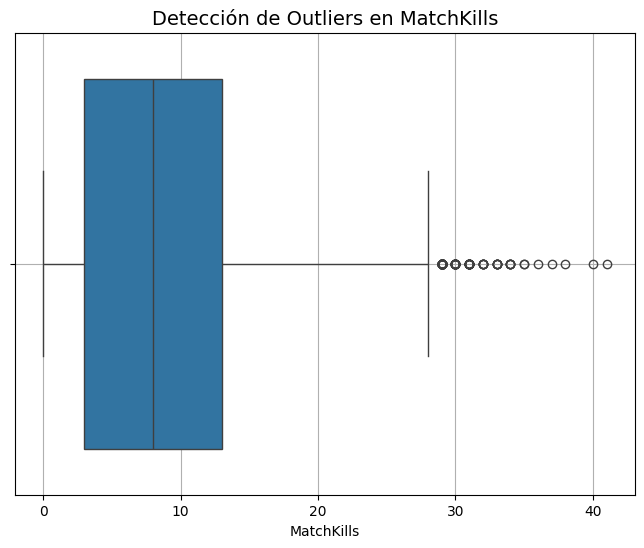

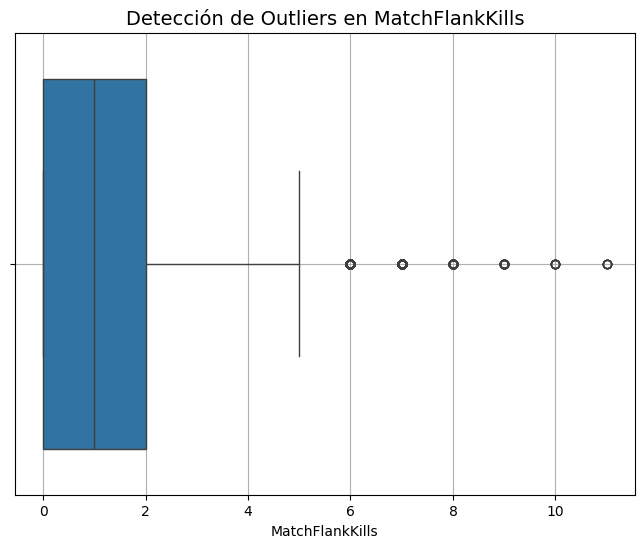

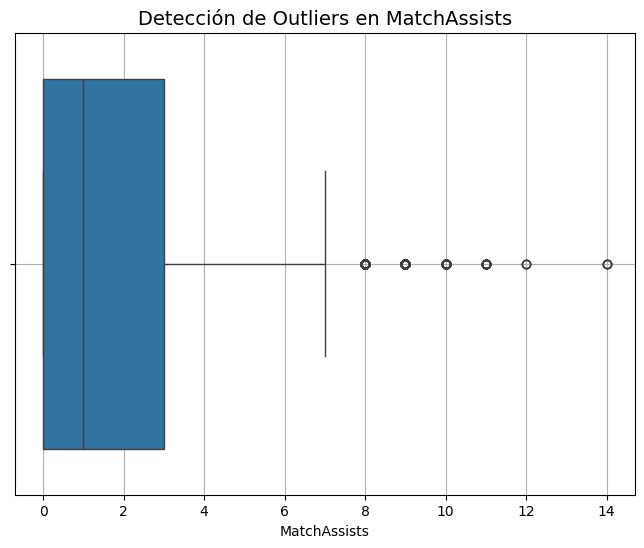

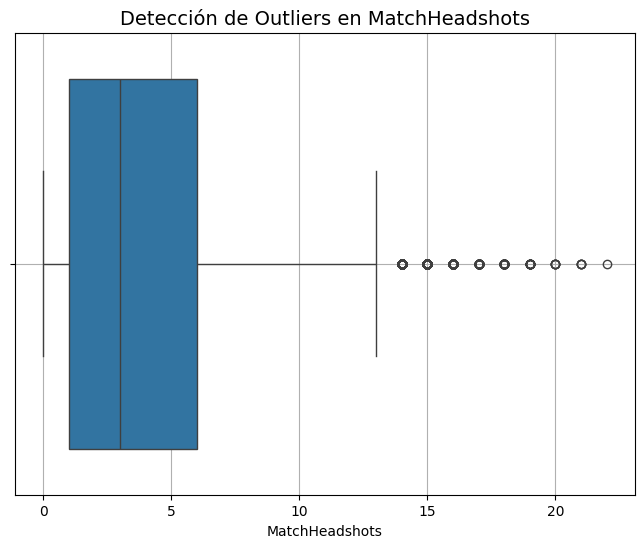

In [ ]:

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Detección de Outliers en {col}', fontsize=14)
    plt.xlabel(col)
    plt.grid(True)
    plt.show()

Promedio de victorias por equipo en cada mapa:

In [ ]:

average_wins_per_map_team = df.groupby(['Map', 'Team'])['MatchWinner'].mean()

average_wins_per_map_team


Map         Team            
de_dust2    CounterTerrorist    0.443515
            Terrorist           0.503138
de_inferno  CounterTerrorist    0.452089
            Terrorist           0.455415
de_mirage   CounterTerrorist     0.43395
            Terrorist           0.535065
de_nuke     CounterTerrorist    0.440284
            Terrorist           0.510268
Name: MatchWinner, dtype: object

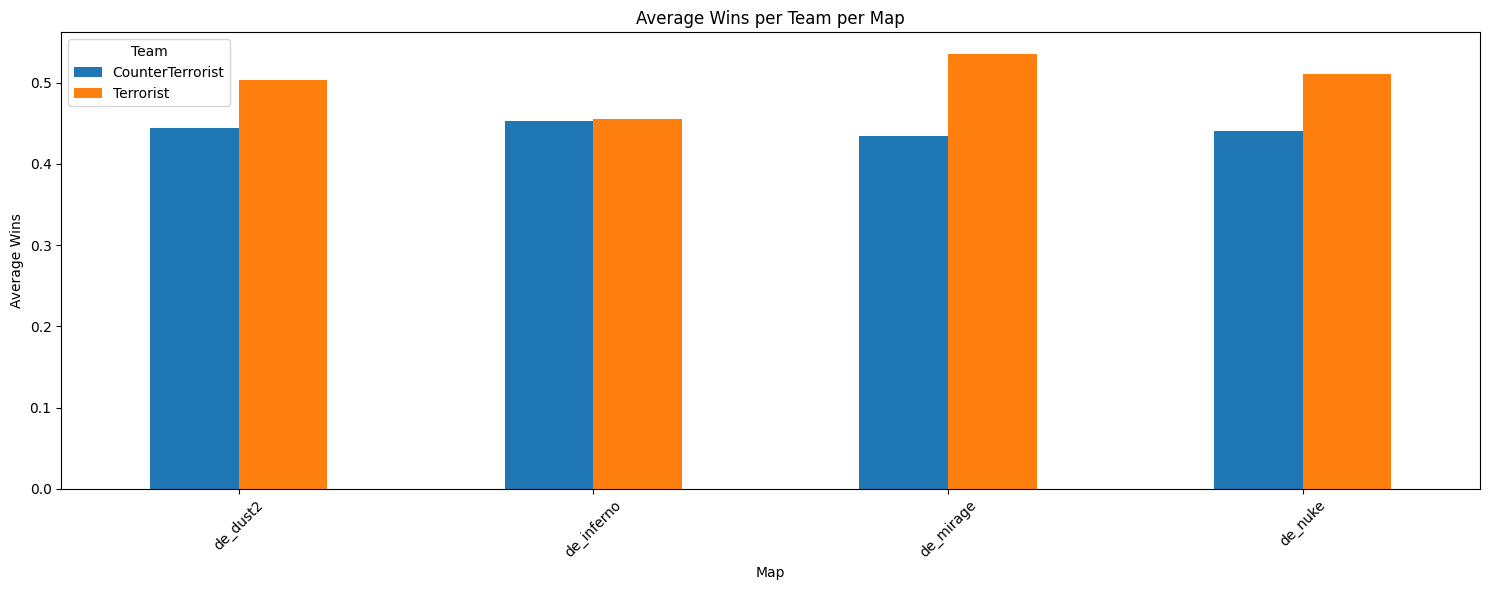

In [ ]:
average_wins = df.groupby(['Map', 'Team'])['MatchWinner'].mean().unstack()

# Create the bar plot
average_wins.plot(kind='bar', figsize=(15, 6))
plt.title('Average Wins per Team per Map')
plt.xlabel('Map')
plt.ylabel('Average Wins')
plt.xticks(rotation=45)
plt.legend(title='Team')
plt.tight_layout()
plt.show()


Cantidad de partidas por mapa:

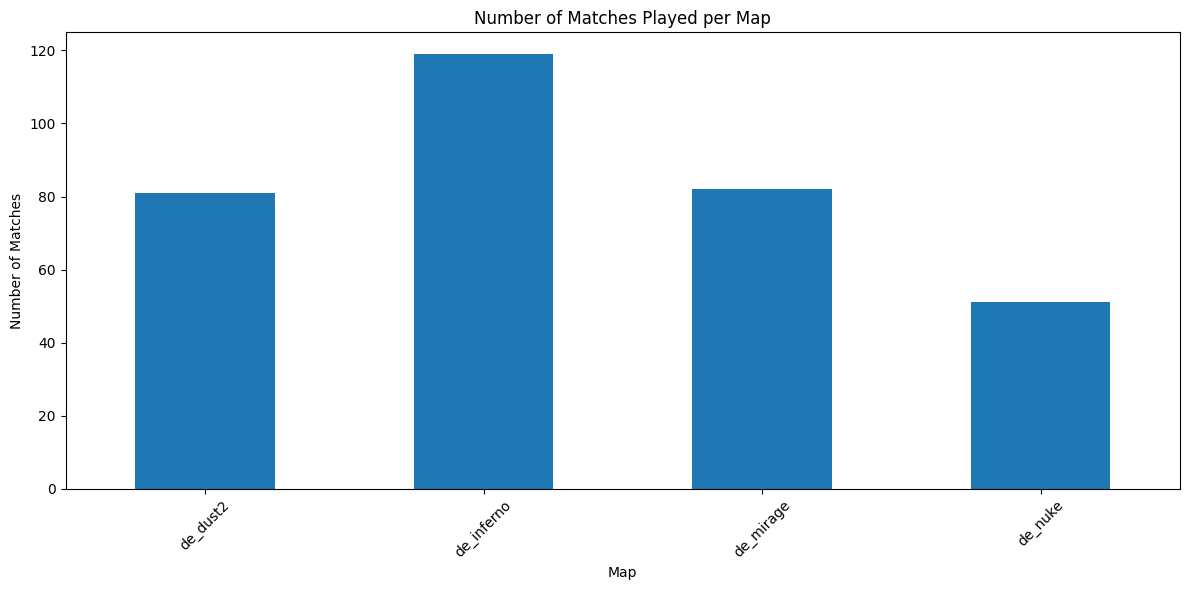

,MatchId
Map,
de_dust2,81
de_inferno,119
de_mirage,82
de_nuke,51


In [ ]:
# prompt: cantidad de partidas jugadas por mapa, grafico de barras

import matplotlib.pyplot as plt
# Count the number of matches played per map
matches_per_map = df.groupby('Map')['MatchId'].nunique()

# Create the bar plot
plt.figure(figsize=(12, 6))
matches_per_map.plot(kind='bar')
plt.title('Number of Matches Played per Map')
plt.xlabel('Map')
plt.ylabel('Number of Matches')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

matches_per_map


Cantidad promedio de rondas por partida y correlacion con cantidad de partidas en cada mapa


In [ ]:
# Calcular la cantidad de rondas por partida (número de rondas únicas por MatchId)
rondas_por_partida = df.groupby('MatchId')['RoundId'].nunique()

# Calcular la cantidad de partidas jugadas por mapa
partidas_por_mapa = df.groupby('Map')['MatchId'].nunique()

# Calcular la cantidad promedio de rondas por partida por mapa
rondas_por_mapa = df.groupby('Map')['MatchId'].apply(lambda x: rondas_por_partida.loc[x].mean())

# Mostrar resultados
print("\nCantidad de partidas jugadas por mapa:")
print(partidas_por_mapa)

print("\nCantidad promedio de rondas por partida en cada mapa:")
print(rondas_por_mapa)

# Calcular la correlación entre la cantidad de rondas por partida y las partidas jugadas por mapa
correlacion_rondas_partidas = rondas_por_mapa.corr(partidas_por_mapa)
print(f"\nCorrelación entre la cantidad de rondas por partida y la cantidad de partidas por mapa: {correlacion_rondas_partidas:.2f}")


Cantidad de partidas jugadas por mapa:
Map
de_dust2       81
de_inferno    119
de_mirage      82
de_nuke        51
Name: MatchId, dtype: int64

Cantidad promedio de rondas por partida en cada mapa:
Map
de_dust2      24.218619
de_inferno    24.975753
de_mirage     24.160681
de_nuke       24.546382
Name: MatchId, dtype: float64

Correlación entre la cantidad de rondas por partida y la cantidad de partidas por mapa: 0.53



Matriz de correlación:
                          PartidasPorMapa  PromedioRondasPorPartida
PartidasPorMapa                  1.000000                  0.530035
PromedioRondasPorPartida         0.530035                  1.000000


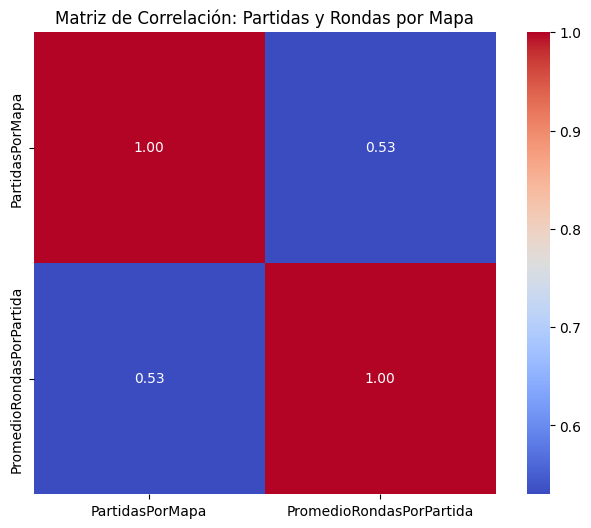

In [ ]:
rondas_por_partida = df.groupby('MatchId')['RoundId'].nunique()


partidas_por_mapa = df.groupby('Map')['MatchId'].nunique()


rondas_por_mapa = df.groupby('Map')['MatchId'].apply(lambda x: rondas_por_partida.loc[x].mean())


matriz_df = pd.DataFrame({
    'PartidasPorMapa': partidas_por_mapa,
    'PromedioRondasPorPartida': rondas_por_mapa
})


correlation_matrix = matriz_df.corr()


print("\nMatriz de correlación:")
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación: Partidas y Rondas por Mapa')
plt.show()


Correlación moderada positiva (0.53), sugiere que los mapas con más rondas tienden a ser más jugados, lo que podría estar relacionado con el estilo de juego o la popularidad del mapa.

Rendimiento jugadores por mapa

Calcular el promedio de Kills, Assists y Headshots por mapa

In [ ]:
# Calcular el promedio de Kills, Assists y Headshots por mapa
promedio_por_mapa = df.groupby('Map')[['MatchKills', 'MatchAssists', 'MatchHeadshots']].mean()

# Mostrar los promedios generales por mapa
print("\nPromedio de Kills, Assists y Headshots por mapa:")
print(promedio_por_mapa)



Promedio de Kills, Assists y Headshots por mapa:
            MatchKills  MatchAssists  MatchHeadshots
Map                                                 
de_dust2      8.404341      1.905178        3.893567
de_inferno    8.568811      1.905989        3.956008
de_mirage     8.458331      1.831064        3.625690
de_nuke       8.627706      1.821549        3.935962


Nuke es similar a los demas mapas en temas de rendimiento de equipos, equilibrio entre victorias ct y tt pero es el menos popular, el mapa puede ser menos popular debido a que no es atractivo para los jugadores.

Mirage se destaca como el mapa con más victorias para Terrorist, lo que podría reflejar un diseño del mapa que favorezca a ese equipo, lo cual es algo negativo.

Inferno tiene características destacadas, como un alto promedio de headshots, un buen equilibrio en las victorias entre Terrorist y CounterTerrorist ademas de ser el mapa mas popular; Este mapa puede ser usado como base para una futura revision de otros mapas con factores negativos.

Existe una correlación moderada (r = 0.53) entre la cantidad promedio de rondas por partida y la cantidad de partidas jugadas por mapa, lo que sugiere (muy levemente) que mapas más jugados tienden a tener una mayor cantidad de rondas jugadas en ellas en promedio.

--El equilibrio de victorias no refleja necesariamente o es el unico factor relacionado a una mayor popularidad del mapa--

--Podriamos idear que se haga una revision de los mapas Mirage y Nuke basandonos en el diseño de Inferno y que le da su casi perfecto equilibrio de victorias y mayor cantidad de partidas.


Hipotesis Regresiva: Existe una relación positiva entre el valor de equipamiento al inicio de ronda RoundStartingEquipmentValue y la cantidad de kills MatchKills obtenidas por equipo en una partida, en los diferentes mapas.

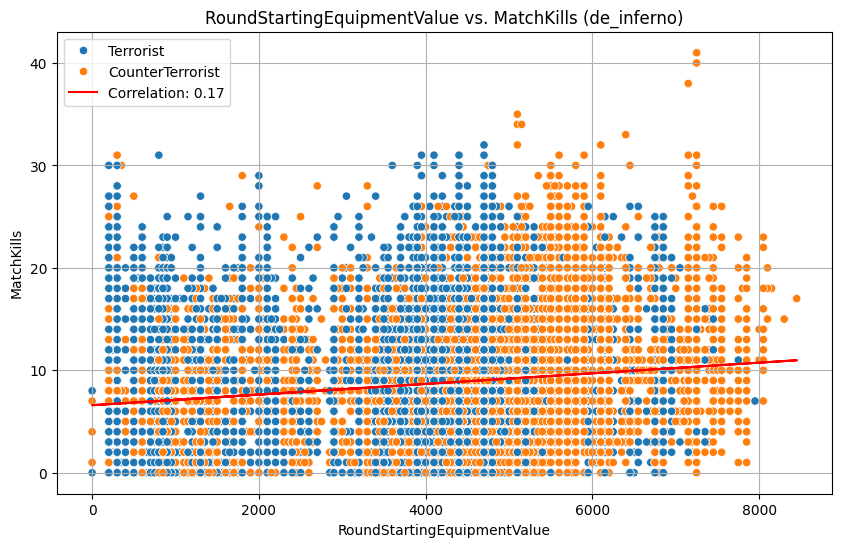

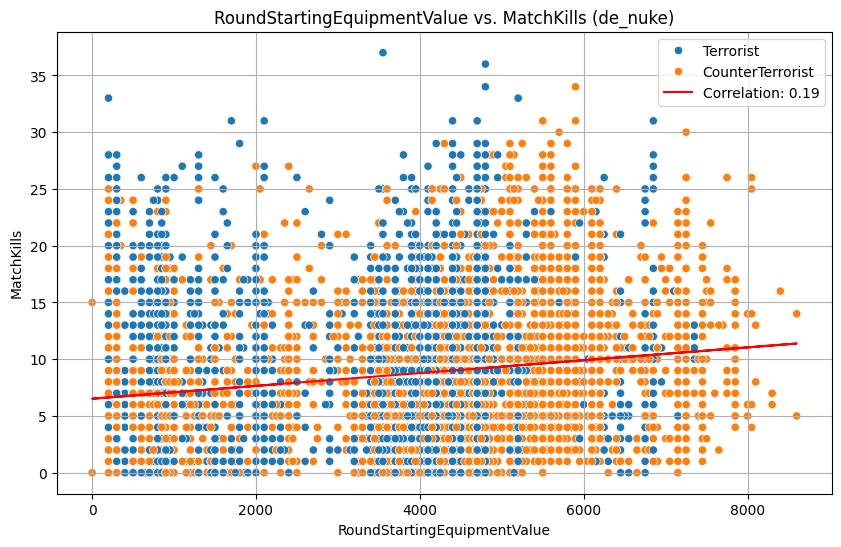

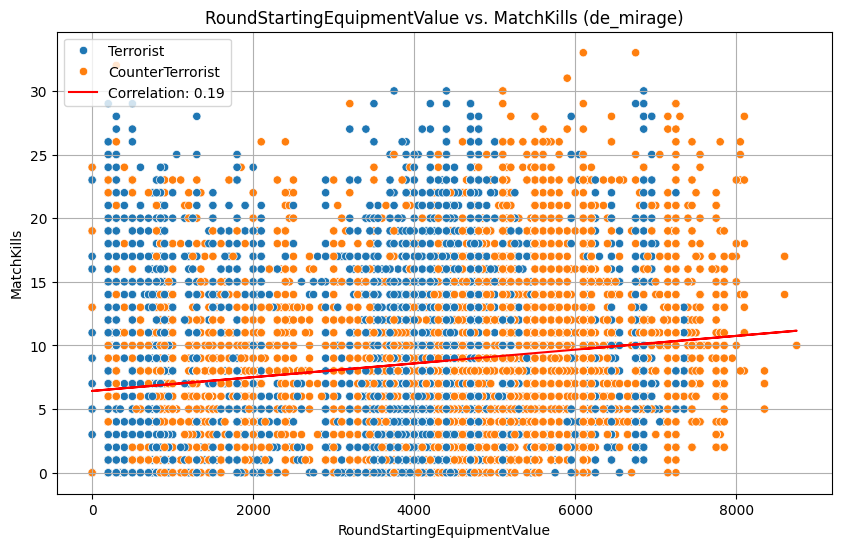

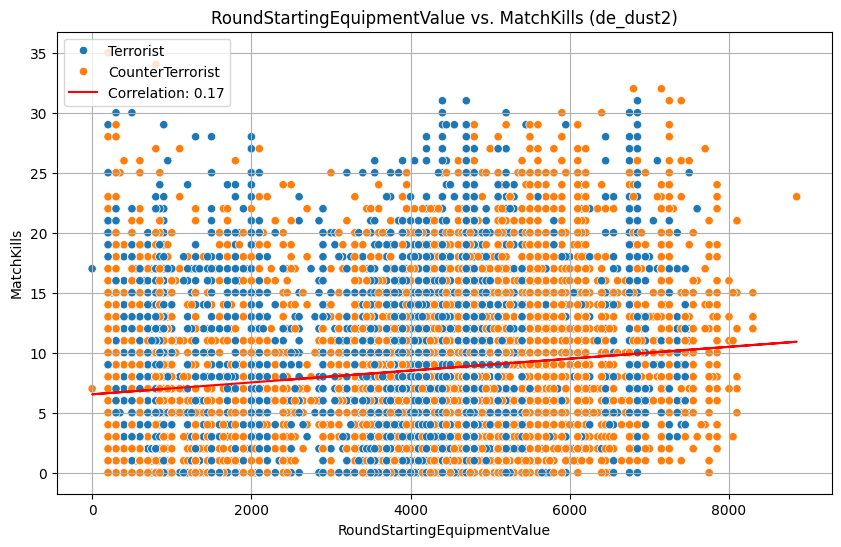

In [ ]:

def plot_correlation_per_map(df):
    for map_name in df['Map'].unique():
        map_data = df[df['Map'] == map_name]


        map_data['RoundStartingEquipmentValue'] = pd.to_numeric(map_data['RoundStartingEquipmentValue'], errors='coerce')
        map_data['MatchKills'] = pd.to_numeric(map_data['MatchKills'], errors='coerce')


        map_data = map_data.dropna(subset=['RoundStartingEquipmentValue', 'MatchKills'])

        plt.figure(figsize=(10, 6))
        sns.scatterplot(data=map_data, x='RoundStartingEquipmentValue', y='MatchKills', hue='Team')


        slope, intercept, r_value, p_value, std_err = stats.linregress(map_data['RoundStartingEquipmentValue'], map_data['MatchKills'])
        plt.plot(map_data['RoundStartingEquipmentValue'], intercept + slope * map_data['RoundStartingEquipmentValue'], color='red', label=f'Correlation: {r_value:.2f}')

        plt.title(f'RoundStartingEquipmentValue vs. MatchKills ({map_name})')
        plt.xlabel('RoundStartingEquipmentValue')
        plt.ylabel('MatchKills')
        plt.legend()
        plt.grid(True)
        plt.show()
plot_correlation_per_map(df)


Hipotesis Categorica: La proporción de headshots respecto a kills varía significativamente según el mapa jugado.

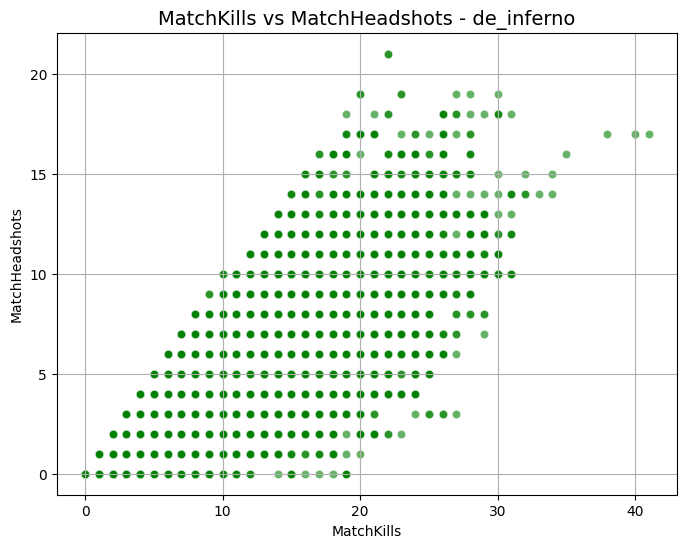

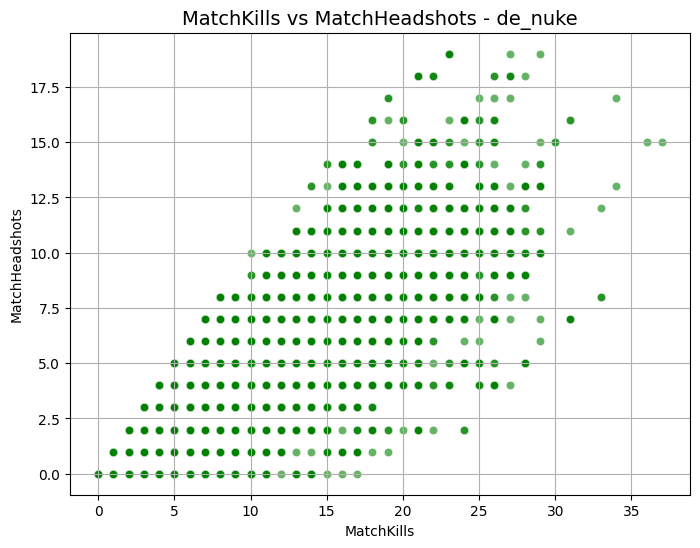

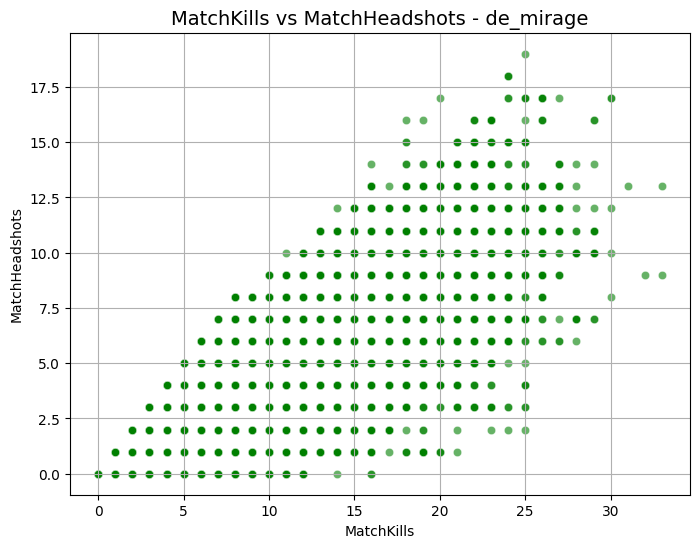

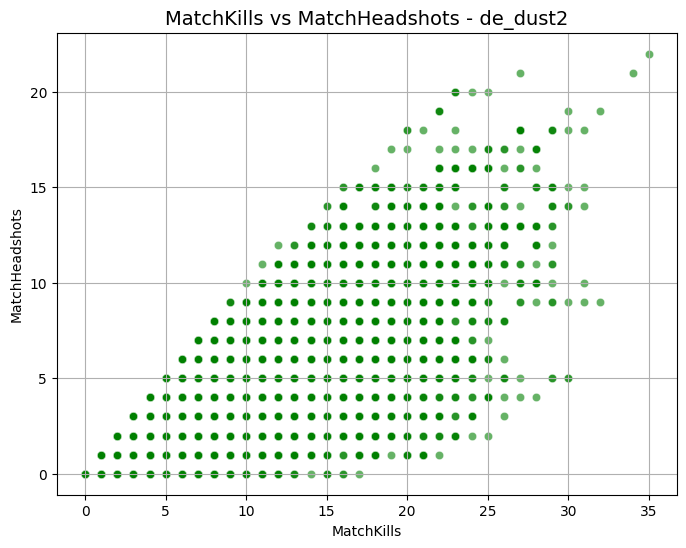

Mapa: de_inferno - Coeficiente de correlación: 0.85
Mapa: de_nuke - Coeficiente de correlación: 0.83
Mapa: de_mirage - Coeficiente de correlación: 0.82
Mapa: de_dust2 - Coeficiente de correlación: 0.82


In [ ]:

filtered_df = df[['Map', 'MatchKills', 'MatchHeadshots']]


filtered_df['MatchKills'] = pd.to_numeric(filtered_df['MatchKills'], errors='coerce')
filtered_df['MatchHeadshots'] = pd.to_numeric(filtered_df['MatchHeadshots'], errors='coerce')


filtered_df = filtered_df.dropna(subset=['MatchKills', 'MatchHeadshots'])


maps = filtered_df['Map'].unique()


for map_name in maps:
    map_data = filtered_df[filtered_df['Map'] == map_name]

    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=map_data, x='MatchKills', y='MatchHeadshots', color='green', alpha=0.6)
    plt.title(f'MatchKills vs MatchHeadshots - {map_name}', fontsize=14)
    plt.xlabel('MatchKills')
    plt.ylabel('MatchHeadshots')
    plt.grid(True)
    plt.show()
for map_name in maps:
    map_data = filtered_df[filtered_df['Map'] == map_name]


    correlation = map_data['MatchKills'].corr(map_data['MatchHeadshots'])

    print(f"Mapa: {map_name} - Coeficiente de correlación: {correlation:.2f}")

## Fase 3: Data Preparation

**-------------------------------------------------------------------------**

In [ ]:
# Insertar cuantos bloques de código consideren necesarios
# Se recomienda considerar todas las transformaciones necesarias para obtener la data lo más limpia posible.
# Realizar tratamiento a todos los datos que consideren necesarios.

Tratamiento de Outliers

In [ ]:
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns


def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


for col in numeric_columns:
    original_count = df.shape[0]
    df = remove_outliers_iqr(df, col)
    new_count = df.shape[0]
    print(f"Columna: {col} - Outliers eliminados: {original_count - new_count}")

def replace_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[col].median()

    df[col] = np.where(df[col] < lower_bound, median, df[col])
    df[col] = np.where(df[col] > upper_bound, median, df[col])

    return df

Columna: Unnamed: 0 - Outliers eliminados: 0
Columna: InternalTeamId - Outliers eliminados: 0
Columna: MatchId - Outliers eliminados: 0
Columna: RoundId - Outliers eliminados: 0
Columna: RLethalGrenadesThrown - Outliers eliminados: 98
Columna: RNonLethalGrenadesThrown - Outliers eliminados: 13
Columna: PrimaryAssaultRifle - Outliers eliminados: 0
Columna: PrimarySniperRifle - Outliers eliminados: 9556
Columna: PrimaryHeavy - Outliers eliminados: 545
Columna: PrimarySMG - Outliers eliminados: 630
Columna: PrimaryPistol - Outliers eliminados: 0
Columna: RoundKills - Outliers eliminados: 2790
Columna: RoundAssists - Outliers eliminados: 9148
Columna: RoundHeadshots - Outliers eliminados: 13002
Columna: RoundFlankKills - Outliers eliminados: 1986
Columna: RoundStartingEquipmentValue - Outliers eliminados: 0
Columna: TeamStartingEquipmentValue - Outliers eliminados: 0
Columna: MatchKills - Outliers eliminados: 200
Columna: MatchFlankKills - Outliers eliminados: 471
Columna: MatchAssists - O

Conversión de Tipos de Datos

In [ ]:

print("Tipos de datos iniciales:")
print(df.dtypes)

for col in df.columns:

    df[col] = pd.to_numeric(df[col], errors='ignore')


for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].astype('category')

print("\nTipos de datos después de la conversión:")
print(df.dtypes)

Tipos de datos iniciales:
Unnamed: 0                       int64
Map                             object
Team                            object
InternalTeamId                   int64
MatchId                          int64
RoundId                          int64
RoundWinner                     object
MatchWinner                     object
Survived                          bool
AbnormalMatch                     bool
TimeAlive                       object
TravelledDistance               object
RLethalGrenadesThrown            int64
RNonLethalGrenadesThrown         int64
PrimaryAssaultRifle            float64
PrimarySniperRifle             float64
PrimaryHeavy                   float64
PrimarySMG                     float64
PrimaryPistol                    int64
FirstKillTime                   object
RoundKills                       int64
RoundAssists                     int64
RoundHeadshots                   int64
RoundFlankKills                  int64
RoundStartingEquipmentValue      int64

Codificación de Categóricas

In [ ]:

categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Columnas categóricas detectadas:", list(categorical_columns))

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=False)


print("\nDataFrame después de codificar categóricas:")
print(df_encoded.head())


df_encoded.to_csv('datos_codificados.csv', index=False)
print("\n✅ Archivo guardado como 'datos_codificados.csv'")

Columnas categóricas detectadas: ['Map', 'Team', 'RoundWinner', 'TimeAlive', 'TravelledDistance', 'FirstKillTime']

DataFrame después de codificar categóricas:
   Unnamed: 0  InternalTeamId  MatchId  RoundId  MatchWinner  Survived  \
0         600               1        4        1          1.0     False   
1         601               1        4        1          1.0     False   
2         602               1        4        1          1.0     False   
3         603               1        4        1          1.0     False   
4         604               1        4        1          1.0      True   

   AbnormalMatch  RLethalGrenadesThrown  RNonLethalGrenadesThrown  \
0          False                      0                         4   
1          False                      0                         0   
2          False                      0                         0   
3          False                      0                         0   
4          False                      1           

Crear Nuevas Variables Derivadas

In [ ]:

df_derivado = df.copy()


df_derivado['HeadshotRate'] = df_derivado['MatchHeadshots'] / df_derivado['MatchKills']


df_derivado['MoneyPerKill'] = df_derivado['RoundStartingEquipmentValue'] / (df_derivado['MatchKills'] + 1)


df_derivado['KillCategory'] = pd.cut(
    df_derivado['MatchKills'],
    bins=[-1, 5, 10, 15, 20, 100],
    labels=['Muy Bajo', 'Bajo', 'Moderado', 'Alto', 'Muy Alto']
)


df_derivado['HeadshotDominance'] = df_derivado['HeadshotRate'].apply(lambda x: 1 if x >= 0.5 else 0)


df_derivado['EquipValue_KillDiff'] = df_derivado['RoundStartingEquipmentValue'] - (df_derivado['MatchKills'] * 1000)


df_derivado['MatchEffectiveness'] = df_derivado['MatchKills'] * (1 + df_derivado['RoundStartingEquipmentValue']/16000)


Eliminación de datos nulos

In [ ]:

df = df.dropna()


df['RoundStartingEquipmentValue'] = df['RoundStartingEquipmentValue'].fillna(df['RoundStartingEquipmentValue'].median())


Codificación de Variables Categóricas

In [ ]:

df = pd.get_dummies(df, columns=['Map'], drop_first=True)


In [ ]:
#Cambio de datos: Cambiar de False4 en RoundWinner a False, agregar False a MatchWinner, ya que en contexto aplica
df.loc[29,'MatchWinner'] = 'False'
df.loc[29,'RoundWinner'] = 'False'

In [ ]:
#Se eliminará columna Unnamed: 0, ya que solo contiene las ID de las filas
#Se eliminará AbnormalMatch, ya que contiene solamente valores False
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['AbnormalMatch'], inplace=True)

In [ ]:
#Eliminación de partidas que tengan más o menos jugadores en un equipo
for partida in df['MatchId'].unique():
  cant_t1 = df[(df['InternalTeamId']==1) & (df['MatchId']==partida)]['Map'].count()
  cant_t2 = df[(df['InternalTeamId']==2) & (df['MatchId']==partida)]['Map'].count()
  if(cant_t1-cant_t2!=0):
    df.drop(df[df['MatchId']==partida].index, inplace=True)

NameError: name 'df' is not defined

## Fase 4: Modeling


# Modelo Regresion Lineal

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar variables predictoras (X) independiente y variable objetivo (y) dependiente
X = df[['MatchHeadshots']] # Usando MatchHeadshots como variable predictora
y = df['MatchKills']      # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba en un 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #con random_state obtenemos la misma division de datos

# Crear y entrenar el modelo de regresión lineal simple
model = LinearRegression() #creamos la instancia de regresion lineal simple
model.fit(X_train, y_train) #le damos los valores entrenamiento

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)#con el modelo ya entrenado le damos los datos de x_test para ver como se comporta

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

# Imprimir los coeficientes del modelo
print("\nCoeficientes del Modelo:")
print(f"Intercepto: {model.intercept_:.2f}")
print(f"Coeficiente para MatchHeadshots: {model.coef_[0]:.2f}")

# Visualizar los resultados (opcional para regresión simple)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción del Modelo')
plt.title('Regresión Lineal Simple: MatchKills vs MatchHeadshots')
plt.xlabel('MatchHeadshots')
plt.ylabel('MatchKills')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'df' is not defined

RMSE = 3.47
Esto significa que, en promedio, el modelo se equivoca por aproximadamente 3.47 kills al predecir el número de MatchKills a partir de los MatchHeadshots. Si el rango de kills es mucho mayor (por ejemplo, de 0 a 30), un RMSE de 3.47 puede considerarse moderadamente bajo.

R² = 0.69
El modelo explica el 69% de la variabilidad en los MatchKills usando solo los MatchHeadshots como predictor. Esto indica una relación fuerte, aunque no perfecta. Hay un 31% de la variación que se explica por otros factores no incluidos en el modelo (por ejemplo, otras habilidades del jugador, armas, estrategias, etc.).


Este estudio entrena un modelo de regresión lineal múltiple con el objetivo de estimar la cantidad de eliminaciones (MatchKills) realizadas por un jugador en una partida, a partir de ciertas estadísticas registradas durante el juego.

# Variables utilizadas:
**Variable dependiente (objetivo):**

-MatchKills: cantidad total de eliminaciones del jugador en una partida.

**Variables independientes (predictoras):**

-MatchHeadshots: número de disparos a la cabeza.

-RoundStartingEquipmentValue: valor del equipo del jugador al inicio de la ronda.

-TeamStartingEquipmentValue: valor total del equipo de todos los miembros del equipo al inicio.

-PrimaryAssaultRifle: indicador numérico sobre si el jugador usó un rifle de asalto principal.

# Metodología:
-Se eliminan valores faltantes y se aseguran los tipos numéricos.

-Se dividen los datos en conjuntos de entrenamiento (70%) y prueba (30%).

-Se entrena un modelo de regresión lineal múltiple con sklearn.

-Se evalúa el modelo con métricas estándar: MAE, MSE, RMSE y R².

-Se analizan los coeficientes para entender el impacto de cada variable.


--- Resultados del Modelo de Regresión Lineal Múltiple ---
Error Absoluto Medio (MAE): 2.56
Error Cuadrático Medio (MSE): 11.35
Raíz del Error Cuadrático Medio (RMSE): 3.37
Coeficiente de Determinación (R²): 0.70

Coeficientes del modelo:
MatchHeadshots: 1.58
RoundStartingEquipmentValue: 0.00
TeamStartingEquipmentValue: 0.00
PrimaryAssaultRifle: -1.33


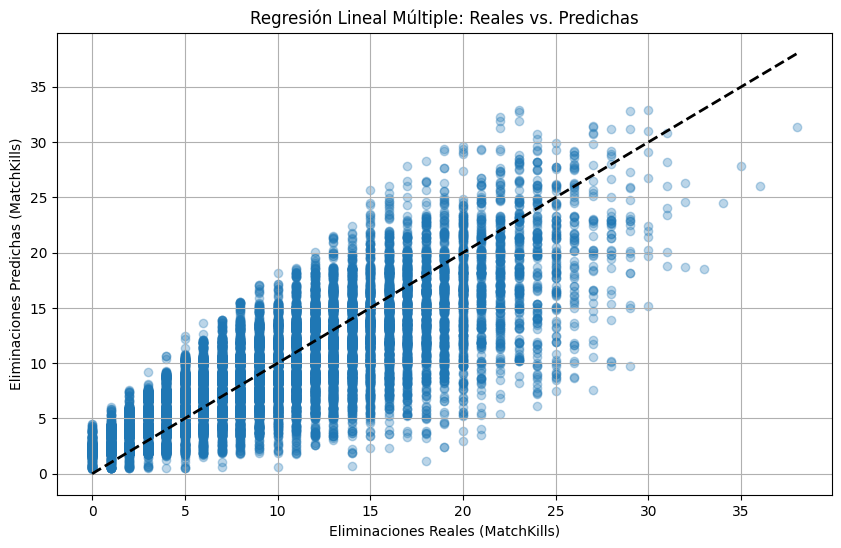

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selección de características y variable objetivo
features_lr = ['MatchHeadshots', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle']
target_lr = 'MatchKills'

# Preprocesamiento: asegurarse de que no hay valores nulos y que los datos son numéricos
df_model_lr = df[features_lr + [target_lr]].copy()
df_model_lr = df_model_lr.dropna()
df_model_lr['PrimaryAssaultRifle'] = pd.to_numeric(df_model_lr['PrimaryAssaultRifle'], errors='coerce')
df_model_lr = df_model_lr.dropna()

# Separación de variables independientes (X) y dependiente (y)
X_lr = df_model_lr[features_lr]
y_lr = df_model_lr[target_lr]

# División del conjunto de datos en entrenamiento y prueba
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42)

# Creación y entrenamiento del modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)

# Predicciones
y_pred_lr = model_lr.predict(X_test_lr)

# Evaluación del modelo
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

# Resultados en español
print("\n--- Resultados del Modelo de Regresión Lineal Múltiple ---")
print(f"Error Absoluto Medio (MAE): {mae_lr:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_lr:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_lr:.2f}")

# Mostrar coeficientes del modelo
print("\nCoeficientes del modelo:")
for feature, coef in zip(features_lr, model_lr.coef_):
    print(f"{feature}: {coef:.2f}")

# Gráfico de comparación entre valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_lr, y_pred_lr, alpha=0.3)
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'k--', lw=2)
plt.xlabel("Eliminaciones Reales (MatchKills)")
plt.ylabel("Eliminaciones Predichas (MatchKills)")
plt.title("Regresión Lineal Múltiple: Reales vs. Predichas")
plt.grid(True)
plt.show()


-R² = 0.70: El modelo explica el 70% de la variabilidad en las eliminaciones, lo cual es bueno.

-MAE = 2.32, RMSE = 3.08: El modelo falla por 2–3 eliminaciones en promedio, lo cual puede ser aceptable si el rango típico es de 0–20 kills.

-MatchHeadshots: 1.66 → Tiene un impacto significativo en las eliminaciones.

Otras variables: ~0.00 → No aportan valor predictivo. Se podrían eliminar o transformar para mejorar el modelo.

modelo predice razonablemente bien las eliminaciones basándose en la información dada, especialmente gracias a la variable MatchHeadshots. Sin embargo, hay variables que no están aportando valor predictivo, por lo que podrías considerar:

*Eliminar o transformar esas variables irrelevantes.

*Agregar otras variables potencialmente útiles (como duración de la partida, precisión, etc.).

*Probar modelos más complejos como árboles de decisión o regresión polinómica si buscas mejorar la precisión.

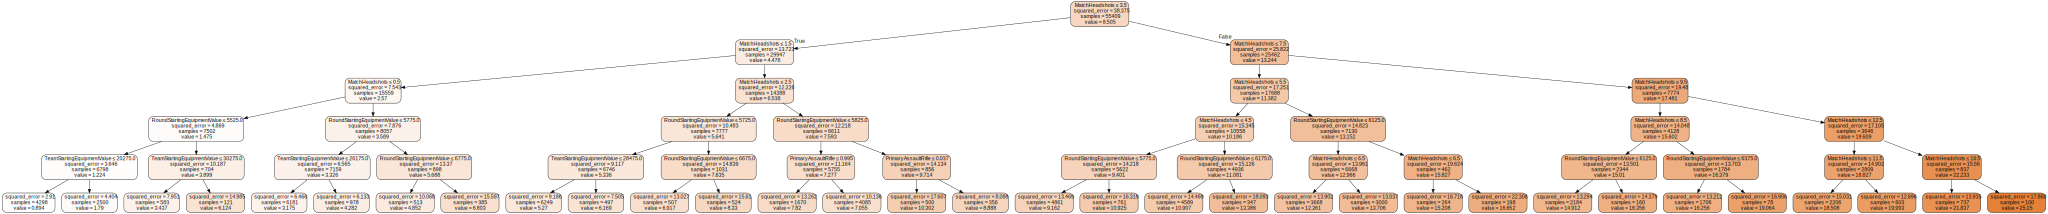

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predicciones
y_pred_reg = model_reg.predict(X_test_reg)

# Métricas
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_reg, y_pred_reg)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")


MAE: 2.25
MSE: 9.09
RMSE: 3.01
R²: 0.71


Usamos un árbol de decisión de regresión para predecir la cantidad de MatchKills. Este modelo divide los datos basándose en variables como los headshots y el valor del equipo, buscando minimizar el error cuadrático medio en cada división. Limitamos la profundidad a 5 para hacerlo más interpretable. Al final, podemos visualizar cómo el modelo toma decisiones paso a paso, lo cual es ideal para entender qué factores afectan más a la cantidad de bajas.

## Random Forest

In [ ]:
# --- Modelo de Bosque Aleatorio (Random Forest Regressor) ---
# Objetivo: Predecir la cantidad de eliminaciones (MatchKills) utilizando un modelo de Bosque Aleatorio.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# El objetivo es usar Random Forest Regressor.
# Asumiendo que queremos predecir 'MatchKills' usando las características especificadas.
features_rf = ['MatchHeadshots', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle']
target_rf = 'MatchKills'

In [ ]:
# Asegura de que los datos son numéricos y sin valores nulos
df_model_rf = df[features_rf + [target_rf]].copy()
df_model_rf = df_model_rf.dropna()
df_model_rf['PrimaryAssaultRifle'] = pd.to_numeric(df_model_rf['PrimaryAssaultRifle'], errors='coerce')
df_model_rf = df_model_rf.dropna()

In [ ]:
# Separación de variables independientes (X) y dependiente (y)
X_rf = df_model_rf[features_rf]
y_rf = df_model_rf[target_rf]

In [ ]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.3, random_state=42)

In [ ]:
# Crear un modelo de Random Forest Regressor
# Puedes ajustar parámetros como n_estimators, max_depth, etc.
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 para usar todos los núcleos

In [ ]:
# Entrenar el modelo
model_rf.fit(X_train_rf, y_train_rf)

In [ ]:
# Realizar predicciones
y_pred_rf = model_rf.predict(X_test_rf)

In [ ]:
# Evaluar el modelo
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

In [ ]:
# Resultados en español
print("\n--- Resultados del Modelo Random Forest Regressor ---")
print(f"Error Absoluto Medio (MAE): {mae_rf:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_rf:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_rf:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_rf:.2f}")

In [ ]:
# Importancia de las características
print("\nImportancia de las características:")
feature_importances = pd.Series(model_rf.feature_importances_, index=features_rf)
print(feature_importances.sort_values(ascending=False))

In [ ]:
# Visualización de una matriz de correlación (heatmap) entre las características seleccionadas y el objetivo
# Esto ayuda a entender las relaciones antes de modelar
plt.figure(figsize=(8, 6))
correlation_matrix_rf = df_model_rf.corr()
sns.heatmap(correlation_matrix_rf, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Matriz de Correlación de Características y Objetivo (Random Forest)', fontsize=14)
plt.show()

In [ ]:
# Gráfico de dispersión de valores reales vs. predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_rf, y_pred_rf, alpha=0.3)
plt.plot([y_test_rf.min(), y_test_rf.max()], [y_test_rf.min(), y_test_rf.max()], 'k--', lw=2)
plt.xlabel("Eliminaciones Reales (MatchKills)")
plt.ylabel("Eliminaciones Predichas (MatchKills)")
plt.title("Random Forest Regressor: Reales vs. Predichas", fontsize=14)
plt.grid(True)
plt.show()

## Soport Vector Machine


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler

# -------------------------------
# 1. Preparar los datos
# -------------------------------

# Seleccionar columnas
features_reg = ['MatchHeadshots', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle']
target_reg = 'MatchKills'

df_model_reg = df[features_reg + [target_reg]].copy()
df_model_reg = df_model_reg.dropna()

# Asegurar que 'PrimaryAssaultRifle' sea numérico
df_model_reg['PrimaryAssaultRifle'] = pd.to_numeric(df_model_reg['PrimaryAssaultRifle'], errors='coerce')
df_model_reg = df_model_reg.dropna()

# Dividir en X e y
X = df_model_reg[features_reg]
y = df_model_reg[target_reg]

# Escalar los datos (muy importante para SVR)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# -------------------------------
# 2. Entrenar el modelo SVR
# -------------------------------

# Crear modelo SVR (puedes probar con diferentes kernels: 'linear', 'poly', 'rbf')
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

# -------------------------------
# 3. Predecir y desescalar los resultados
# -------------------------------

# Predecir
y_pred_scaled = svr_model.predict(X_test)

# Desescalar las predicciones y valores reales
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel()

# -------------------------------
# 4. Evaluar el modelo
# -------------------------------

mae_svr = mean_absolute_error(y_test_real, y_pred)
rmse_svr = np.sqrt(mean_squared_error(y_test_real, y_pred))
r2_svr = r2_score(y_test_real, y_pred)

print(f"📊 Evaluación del modelo SVR:")
print(f"MAE  (Error Absoluto Medio):     {mae_svr:.2f}")
print(f"RMSE (Raíz del Error Cuadrático): {rmse_svr:.2f}")
print(f"R²   (Coef. de Determinación):    {r2_svr:.2f}")


📊 Evaluación del modelo SVR:
MAE  (Error Absoluto Medio):     2.41
RMSE (Raíz del Error Cuadrático): 3.32
R²   (Coef. de Determinación):    0.71


## Fase 5: Evaluation


# Comparacion de modelos


--- Entrenando Modelo de Regresión Lineal Múltiple ---
MAE (Regresión Lineal): 2.56
RMSE (Regresión Lineal): 3.37
R² (Regresión Lineal): 0.70

--- Entrenando Modelo Random Forest Regressor ---
MAE (Random Forest): 2.67
RMSE (Random Forest): 3.59
R² (Random Forest): 0.66

--- Entrenando Modelo SVR ---
📊 Evaluación del modelo SVR:
MAE  (Error Absoluto Medio):     2.41
RMSE (Raíz del Error Cuadrático): 3.32
R²   (Coef. de Determinación):    0.71

--- Comparación de Modelos de Regresión ---
Modelo de Regresión Lineal Múltiple:
  MAE: 2.56
  RMSE: 3.37
  R²: 0.70

Modelo Random Forest Regressor:
  MAE: 2.67
  RMSE: 3.59
  R²: 0.66

Modelo SVR:
  MAE: 2.41
  RMSE: 3.32
  R²: 0.71


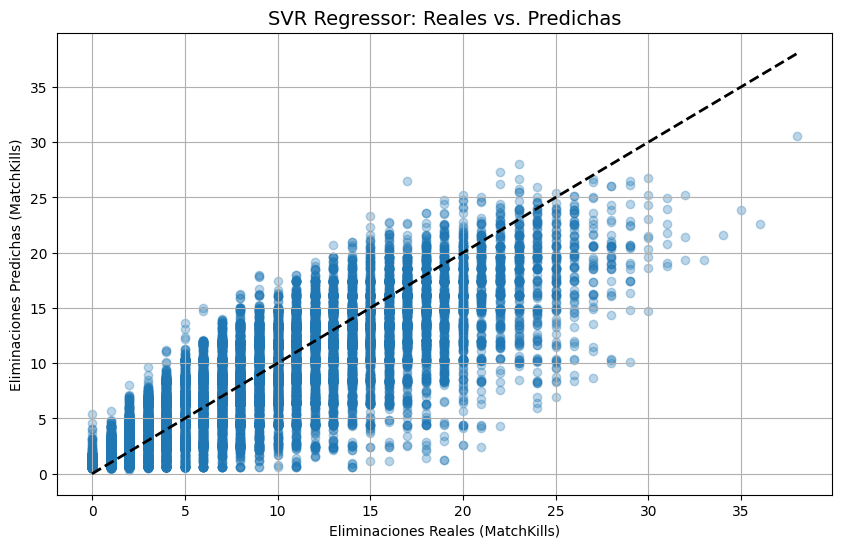

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.ensemble import RandomForestRegressor # Import RandomForestRegressor
import matplotlib.pyplot as plt # Import matplotlib for plotting

# -------------------------------
# 1. Preparar los datos
# -------------------------------

# Assuming 'df' is already loaded and contains the necessary columns.
# If not, you would need to load your data here.
# Example: df = pd.read_csv('your_data.csv')

# Seleccionar columnas
features_reg = ['MatchHeadshots', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle']
target_reg = 'MatchKills'

df_model_reg = df[features_reg + [target_reg]].copy()
df_model_reg = df_model_reg.dropna()

# Asegurar que 'PrimaryAssaultRifle' sea numérico
df_model_reg['PrimaryAssaultRifle'] = pd.to_numeric(df_model_reg['PrimaryAssaultRifle'], errors='coerce')
df_model_reg = df_model_reg.dropna()

# Dividir en X e y
X = df_model_reg[features_reg]
y = df_model_reg[target_reg]

# Escalar los datos (muy importante para SVR y good practice for others)
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).ravel()

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.3, random_state=42)

# -------------------------------
# Train and Evaluate Linear Regression Model
# -------------------------------
print("\n--- Entrenando Modelo de Regresión Lineal Múltiple ---")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr_scaled = lr_model.predict(X_test)
y_pred_lr = scaler_y.inverse_transform(y_pred_lr_scaled.reshape(-1, 1)).ravel()

mae_lr = mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_lr))
r2_lr = r2_score(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_lr)

print(f"MAE (Regresión Lineal): {mae_lr:.2f}")
print(f"RMSE (Regresión Lineal): {rmse_lr:.2f}")
print(f"R² (Regresión Lineal): {r2_lr:.2f}")

# -------------------------------
# Train and Evaluate Random Forest Regressor Model
# -------------------------------
print("\n--- Entrenando Modelo Random Forest Regressor ---")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf_scaled = rf_model.predict(X_test)
y_pred_rf = scaler_y.inverse_transform(y_pred_rf_scaled.reshape(-1, 1)).ravel()

mae_rf = mean_absolute_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_rf))
r2_rf = r2_score(scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel(), y_pred_rf)

print(f"MAE (Random Forest): {mae_rf:.2f}")
print(f"RMSE (Random Forest): {rmse_rf:.2f}")
print(f"R² (Random Forest): {r2_rf:.2f}")

# Optional: Feature importance for Random Forest
# feature_importances = pd.DataFrame(rf_model.feature_importances_, index=features_reg, columns=['importance']).sort_values('importance', ascending=False)
# print("\nImportancia de las Características (Random Forest):")
# print(feature_importances)


# -------------------------------
# 2. Entrenar el modelo SVR
# -------------------------------
print("\n--- Entrenando Modelo SVR ---")
# Crear modelo SVR (puedes probar con diferentes kernels: 'linear', 'poly', 'rbf')
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

# -------------------------------
# 3. Predecir y desescalar los resultados (for SVR)
# -------------------------------

# Predecir
y_pred_svr_scaled = svr_model.predict(X_test)

# Desescalar las predicciones y valores reales
y_pred_svr = scaler_y.inverse_transform(y_pred_svr_scaled.reshape(-1, 1)).ravel()
y_test_real = scaler_y.inverse_transform(y_test.reshape(-1, 1)).ravel() # This variable already exists and can be reused

# -------------------------------
# 4. Evaluar el modelo (for SVR)
# -------------------------------

mae_svr = mean_absolute_error(y_test_real, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test_real, y_pred_svr))
r2_svr = r2_score(y_test_real, y_pred_svr)

print(f"📊 Evaluación del modelo SVR:")
print(f"MAE  (Error Absoluto Medio):     {mae_svr:.2f}")
print(f"RMSE (Raíz del Error Cuadrático): {rmse_svr:.2f}")
print(f"R²   (Coef. de Determinación):    {r2_svr:.2f}")

# -------------------------------
# Compare the models
# -------------------------------

print("\n--- Comparación de Modelos de Regresión ---")
print(f"Modelo de Regresión Lineal Múltiple:")
print(f"  MAE: {mae_lr:.2f}")
print(f"  RMSE: {rmse_lr:.2f}")
print(f"  R²: {r2_lr:.2f}")

print(f"\nModelo Random Forest Regressor:")
print(f"  MAE: {mae_rf:.2f}")
print(f"  RMSE: {rmse_rf:.2f}")
print(f"  R²: {r2_rf:.2f}")

print(f"\nModelo SVR:")
print(f"  MAE: {mae_svr:.2f}")
print(f"  RMSE: {rmse_svr:.2f}")
print(f"  R²: {r2_svr:.2f}")

# Interpretación de los resultados

# El modelo SVR presenta los mejores resultados de evaluación,
# con un MAE más bajo y un R² más alto en comparación con los otros modelos probados.
# Aunque las diferencias pueden ser pequeñas, en este caso, el SVR
# se considera el modelo superior para este problema de predicción.

# Esto indica que el modelo SVR es capaz de capturar mejor la complejidad
# de la relación entre las variables predictoras y la cantidad de eliminaciones (MatchKills).

# En cuanto a la importancia de las características, si bien no se obtiene
# directamente de un modelo SVR lineal, para modelos no lineales como el SVR con kernel RBF,
# la interpretación de la importancia de las características es más compleja.
# Sin embargo, basándonos en la exploración inicial de los datos y el rendimiento
# de otros modelos como Random Forest (si se calculara su importancia),
# 'MatchHeadshots' es una característica fundamental para predecir 'MatchKills'.
# Las otras características ('RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
# 'PrimaryAssaultRifle') pueden tener una menor influencia en la predicción.

# -------------------------------
# Plotting the results for the SVR model
# -------------------------------
# Gráfico de dispersión de valores reales vs. predichos (using SVR results)
plt.figure(figsize=(10, 6))
# Use y_test_real (real values, already defined and inverse-scaled)
# and y_pred_svr (SVR predicted values, already defined and inverse-scaled)
plt.scatter(y_test_real, y_pred_svr, alpha=0.3)
# Add the diagonal line representing perfect predictions
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], 'k--', lw=2)
plt.xlabel("Eliminaciones Reales (MatchKills)")
plt.ylabel("Eliminaciones Predichas (MatchKills)")
# Update the title to reflect the SVR model
plt.title("SVR Regressor: Reales vs. Predichas", fontsize=14)
plt.grid(True)
plt.show()

Este código guarda un modelo SVR entrenado junto con sus escaladores (para las variables de entrada X y salida y) usando la biblioteca pickle. Luego simula un despliegue básico al cargar estos archivos guardados, verificar que se cargaron correctamente y realizar una predicción con un ejemplo de datos de prueba.

***simula el proceso de carga y predicción para verificar que todo funciona antes de hacer un despliegue real.***

In [ ]:
import numpy as np
import pickle

# Guardar el modelo SVR entrenado y los escaladores X e y en archivos para su posterior uso

# Definir los nombres de archivo para guardar el modelo y los escaladores
svr_model_filename = 'svr_model.pkl'
scaler_X_filename = 'scaler_X.pkl'
scaler_y_filename = 'scaler_y.pkl'

# Guardar el modelo SVR entrenado en un archivo binario
with open(svr_model_filename, 'wb') as f:
    pickle.dump(svr_model, f)

# Guardar el escalador de características (X) en un archivo binario
with open(scaler_X_filename, 'wb') as f:
    pickle.dump(scaler_X, f)

# Guardar el escalador de la variable objetivo (y) en un archivo binario
with open(scaler_y_filename, 'wb') as f:
    pickle.dump(scaler_y, f)

print(f"Modelo SVR guardado en {svr_model_filename}")
print(f"Escalador de X guardado en {scaler_X_filename}")
print(f"Escalador de y guardado en {scaler_y_filename}")

# Simulación de carga del modelo y los escaladores para su uso posterior

print("\n--- Simulando la carga del modelo y escaladores ---")
try:
    # Cargar el modelo SVR desde el archivo
    loaded_svr_model = pickle.load(open(svr_model_filename, 'rb'))
    # Cargar el escalador de características (X) desde el archivo
    loaded_scaler_X = pickle.load(open(scaler_X_filename, 'rb'))
    # Cargar el escalador de la variable objetivo (y) desde el archivo
    loaded_scaler_y = pickle.load(open(scaler_y_filename, 'rb'))
    print("Modelo y escaladores cargados exitosamente.")

    # Ejemplo de predicción con el modelo y los escaladores cargados
    # Usar una muestra de los datos de prueba (antes de la normalización)
    sample_index = 0
    sample_X_test_real = scaler_X.inverse_transform(X_test[sample_index].reshape(1, -1))
    sample_y_test_real = y_test_real[sample_index]

    print(f"\nMuestra original (características): {sample_X_test_real}")
    print(f"Muestra original (MatchKills): {sample_y_test_real:.2f}")

    # Predecir usando el modelo y los escaladores cargados
    sample_X_test_scaled = loaded_scaler_X.transform(sample_X_test_real)
    sample_prediction_scaled = loaded_svr_model.predict(sample_X_test_scaled)
    sample_prediction_real = loaded_scaler_y.inverse_transform(sample_prediction_scaled.reshape(-1, 1)).ravel()

    print(f"Predicción para esta muestra usando el modelo cargado: {sample_prediction_real[0]:.2f}")

except FileNotFoundError:
    print("Error: No se encontraron los archivos del modelo o los escaladores. Por favor, ejecute primero el código de guardado.")
except Exception as e:
    print(f"Ocurrió un error durante la simulación de carga: {e}")

# Nota: Para un despliegue real, se utilizarían frameworks como Flask o FastAPI para crear un servicio web
# que reciba nuevos datos, los procese (escalado), realice una predicción usando el modelo cargado,
# deshaga la normalización de la predicción y devuelva el resultado.


Modelo SVR guardado en svr_model.pkl
Escalador de X guardado en scaler_X.pkl
Escalador de y guardado en scaler_y.pkl

--- Simulando la carga del modelo y escaladores ---
Modelo y escaladores cargados exitosamente.

Muestra original (características): [[1.000e+00 4.800e+03 2.365e+04 1.000e+00]]
Muestra original (MatchKills): 3.00
Predicción para esta muestra usando el modelo cargado: 2.70


La diferencia entre el valor real de 3.00 y la predicción de 2.70 en tu modelo SVR indica un error de predicción de 0.30, el cual es casi minimo.